# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df = pd.read_csv("./data/grades.csv")
# df = pd.DataFrame(file)
print(df)

     姓名  國文  英文  數學  自然  社會
0   劉俊安   9  10  15  10  13
1   胡玉華  10  10  10   8   9
2   黃淑婷  13  15   8  11  14
3   陳上紫  10  10   8   9  14
4   崔靜成  13  12  14  12  13
..  ...  ..  ..  ..  ..  ..
95  蔡佳燕   9  10   9  13  14
96  吳筱婷   8  10  14  10  15
97  陳家銘  14   9  11   8  12
98  李明威  15   9   8   9  15
99  農揚勇   9  11  12  12  10

[100 rows x 6 columns]


用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
print(df.head(5))

    姓名  國文  英文  數學  自然  社會
0  劉俊安   9  10  15  10  13
1  胡玉華  10  10  10   8   9
2  黃淑婷  13  15   8  11  14
3  陳上紫  10  10   8   9  14
4  崔靜成  13  12  14  12  13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
print(df["國文"])

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64


在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

#### 資料畫出來

要畫個圖很容易。

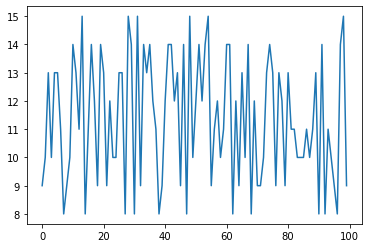

In [6]:
plt.plot(df["國文"])

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

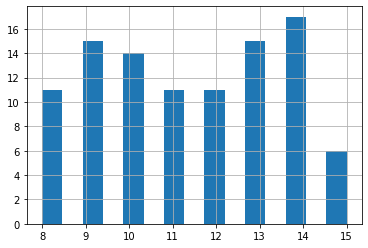

In [7]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [8]:
avg = df["國文"].mean()
avg

11.39

算標準差。

In [9]:
std = df["國文"].std()
std

2.1968526614594834

不如就該算的都幫我們算算...

In [10]:
dsc = df.describe()
dsc

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [11]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [12]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [13]:
df["總級分"] = df.sum(axis=1)
df

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

In [14]:
df["加權"] = df.國文+df.數學*2
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,39
1,胡玉華,10,10,10,8,9,47,30
2,黃淑婷,13,15,8,11,14,61,29
3,陳上紫,10,10,8,9,14,51,26
4,崔靜成,13,12,14,12,13,64,41


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [15]:
df.sort_values(by="總級分", ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,66,37
12,李正偉,11,15,11,14,15,66,33
54,陳怡潔,15,15,9,15,11,65,33
25,蔡亦瑄,13,13,14,13,12,65,41
57,胡淳茜,12,15,14,13,11,65,40
37,曾怡君,11,12,15,13,14,65,41
48,陳怡婷,15,14,12,9,15,65,39
64,俞志峰,9,14,13,14,15,65,35
83,李士賢,10,14,15,13,13,65,40
87,趙偉希,10,13,14,13,15,65,38


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [16]:
df.sort_values(by=["加權", "總級分"], ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
67,林哲法,14,9,15,10,14,62,44
73,吳志遠,13,15,15,8,8,59,43
36,詹威德,12,13,15,10,14,64,42
25,蔡亦瑄,13,13,14,13,12,65,41
37,曾怡君,11,12,15,13,14,65,41
4,崔靜成,13,12,14,12,13,64,41
44,童心怡,13,13,14,8,13,61,41
59,芮秋辛,11,10,15,10,8,54,41
57,胡淳茜,12,15,14,13,11,65,40
83,李士賢,10,14,15,13,13,65,40


### 【重點】重設 index

In [17]:
df.index = range(1, 101)
df

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,劉俊安,9,10,15,10,13,57,39
2,胡玉華,10,10,10,8,9,47,30
3,黃淑婷,13,15,8,11,14,61,29
4,陳上紫,10,10,8,9,14,51,26
5,崔靜成,13,12,14,12,13,64,41
...,...,...,...,...,...,...,...,...
96,蔡佳燕,9,10,9,13,14,55,27
97,吳筱婷,8,10,14,10,15,57,36
98,陳家銘,14,9,11,8,12,54,36
99,李明威,15,9,8,9,15,56,31


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [19]:
df1 = df[df["數學"]==15]
df1
print(df["數學"]==15)

1       True
2      False
3      False
4      False
5      False
       ...  
96     False
97     False
98     False
99     False
100    False
Name: 數學, Length: 100, dtype: bool


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [65]:
df2 = df[(df["數學"]==15) & (df["英文"]==15)]
df2

,姓名,國文,英文,數學,自然,社會,總級分,加權
74,吳志遠,13,15,15,8,8,59,43


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [74]:
df1 = df.drop(labels = "總級分", axis=1)
print(df)
print(df1)

      姓名  國文  英文  數學  自然  社會  總級分  加權
1    劉俊安   9  10  15  10  13   57  39
2    胡玉華  10  10  10   8   9   47  30
3    黃淑婷  13  15   8  11  14   61  29
4    陳上紫  10  10   8   9  14   51  26
5    崔靜成  13  12  14  12  13   64  41
..   ...  ..  ..  ..  ..  ..  ...  ..
96   蔡佳燕   9  10   9  13  14   55  27
97   吳筱婷   8  10  14  10  15   57  36
98   陳家銘  14   9  11   8  12   54  36
99   李明威  15   9   8   9  15   56  31
100  農揚勇   9  11  12  12  10   54  33

[100 rows x 8 columns]
      姓名  國文  英文  數學  自然  社會  加權
1    劉俊安   9  10  15  10  13  39
2    胡玉華  10  10  10   8   9  30
3    黃淑婷  13  15   8  11  14  29
4    陳上紫  10  10   8   9  14  26
5    崔靜成  13  12  14  12  13  41
..   ...  ..  ..  ..  ..  ..  ..
96   蔡佳燕   9  10   9  13  14  27
97   吳筱婷   8  10  14  10  15  36
98   陳家銘  14   9  11   8  12  36
99   李明威  15   9   8   9  15  31
100  農揚勇   9  11  12  12  10  33

[100 rows x 7 columns]


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [75]:
df.drop(labels = "總級分", axis=1, inplace= True)
print(df)

      姓名  國文  英文  數學  自然  社會  加權
1    劉俊安   9  10  15  10  13  39
2    胡玉華  10  10  10   8   9  30
3    黃淑婷  13  15   8  11  14  29
4    陳上紫  10  10   8   9  14  26
5    崔靜成  13  12  14  12  13  41
..   ...  ..  ..  ..  ..  ..  ..
96   蔡佳燕   9  10   9  13  14  27
97   吳筱婷   8  10  14  10  15  36
98   陳家銘  14   9  11   8  12  36
99   李明威  15   9   8   9  15  31
100  農揚勇   9  11  12  12  10  33

[100 rows x 7 columns]


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [86]:
df.drop(df[df["姓名"] == "崔靜成"].index, inplace = True)
df

,姓名,國文,英文,數學,自然,社會,加權
1,劉俊安,9,10,15,10,13,39
2,胡玉華,10,10,10,8,9,30
3,黃淑婷,13,15,8,11,14,29
4,陳上紫,10,10,8,9,14,26
6,張雅岳,13,12,12,12,8,37
...,...,...,...,...,...,...,...
96,蔡佳燕,9,10,9,13,14,27
97,吳筱婷,8,10,14,10,15,36
98,陳家銘,14,9,11,8,12,36
99,李明威,15,9,8,9,15,31


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [87]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

ModuleNotFoundError: No module named 'pandas_datareader'

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-23,24.297501,23.917500,23.967501,24.107500,152074400.0,22.520861
2016-05-24,24.522499,24.209999,24.305000,24.475000,140560800.0,22.864182
2016-05-25,24.934999,24.527500,24.667500,24.905001,152675200.0,23.265877
2016-05-26,25.182501,24.660000,24.920000,25.102501,225324800.0,23.450378
2016-05-27,25.117500,24.812500,24.860001,25.087500,145364800.0,23.436363


#### 只要最後 300 個交易日!

In [3]:
df = df[-300:]

#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

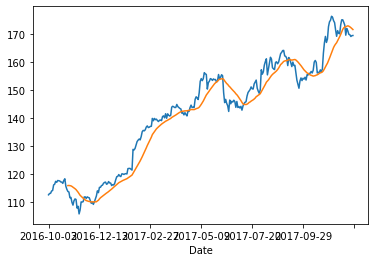

In [4]:
df["Close"].plot()
df["Close"].rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

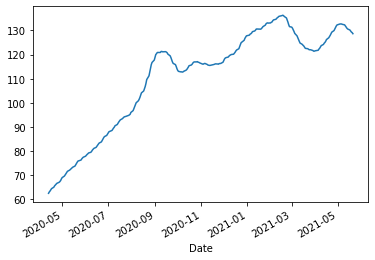

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

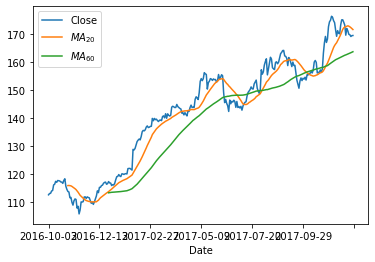

In [5]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [6]:
close = df["Close"].values
len(close)

300

In [7]:
x = close[:-1]
len(x)

299

In [8]:
y = close[1:]

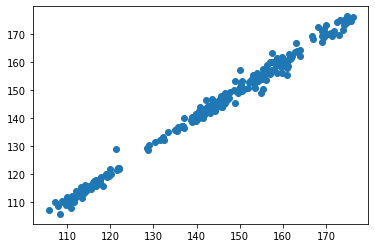

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [41]:
import numpy as np
import pandas as pd
mydata = np.random.randn(4,3)
mydata

array([[-0.84564665, -0.09066256, -1.18573811],
       [ 1.37057277,  0.35567855, -0.82520608],
       [ 0.76680378, -0.85167709, -0.59022264],
       [-0.6253745 , -1.15043135, -1.17964374]])

In [42]:
mydata

array([[-0.84564665, -0.09066256, -1.18573811],
       [ 1.37057277,  0.35567855, -0.82520608],
       [ 0.76680378, -0.85167709, -0.59022264],
       [-0.6253745 , -1.15043135, -1.17964374]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [43]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))
df2

,A,B,C
0,-0.845647,-0.090663,-1.185738
1,1.370573,0.355679,-0.825206
2,0.766804,-0.851677,-0.590223
3,-0.625375,-1.150431,-1.179644


In [44]:
df2

,A,B,C
0,-0.845647,-0.090663,-1.185738
1,1.370573,0.355679,-0.825206
2,0.766804,-0.851677,-0.590223
3,-0.625375,-1.150431,-1.179644


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [45]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))
df3

,A,B,C
0,-1.953968,0.687487,-0.320636
1,1.190708,0.142100,0.622722
2,1.260750,0.040481,0.609152


In [46]:
df3

,A,B,C
0,-1.953968,0.687487,-0.320636
1,1.190708,0.142100,0.622722
2,1.260750,0.040481,0.609152


In [47]:
df4 = pd.concat([df2, df3],axis=0)

In [48]:
df4

,A,B,C
0,-0.845647,-0.090663,-1.185738
1,1.370573,0.355679,-0.825206
2,0.766804,-0.851677,-0.590223
3,-0.625375,-1.150431,-1.179644
0,-1.953968,0.687487,-0.320636
1,1.190708,0.142100,0.622722
2,1.260750,0.040481,0.609152


前面我們弄得亂七八糟的 index 重設一下。

In [49]:
df4.index = range(7)

In [22]:
df4

,A,B,C
0,0.209610,0.143213,1.084381
1,-1.235217,-3.117349,1.240937
2,1.384878,2.333537,0.342803
3,0.081352,1.367854,-0.072977
4,0.387544,-0.056206,-0.146242
5,0.825611,0.252725,0.811823
6,-0.226319,0.004868,-1.080233


#### 横向的貼

In [50]:
df5 = pd.concat([df2, df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [51]:
df5

,A,B,C,A,B,C
0,-0.845647,-0.090663,-1.185738,-1.953968,0.687487,-0.320636
1,1.370573,0.355679,-0.825206,1.190708,0.142100,0.622722
2,0.766804,-0.851677,-0.590223,1.260750,0.040481,0.609152
3,-0.625375,-1.150431,-1.179644,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [52]:
df_names = pd.read_csv("data/names.csv", names = ["姓名"])

In [53]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [56]:
# 用numpy random.randint新增整數亂數，範圍6~16(不包含16, 100*5的array)
# 然後轉乘dataframe
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [57]:
df_grades

,國文,英文,數學,社會,自然
0,14,15,9,9,11
1,9,13,7,7,8
2,13,9,13,14,15
3,9,14,12,12,6
4,15,9,7,11,14
...,...,...,...,...,...
95,15,9,10,9,7
96,8,14,7,15,11
97,15,10,15,13,6
98,15,7,14,8,14


In [58]:
df_grades.to_csv("data/grade2.csv", index = 0)
df_grades

,國文,英文,數學,社會,自然
0,14,15,9,9,11
1,9,13,7,7,8
2,13,9,13,14,15
3,9,14,12,12,6
4,15,9,7,11,14
...,...,...,...,...,...
95,15,9,10,9,7
96,8,14,7,15,11
97,15,10,15,13,6
98,15,7,14,8,14


In [59]:
df_score = pd.concat([df_names, df_grades], axis=1)

In [60]:
df_score

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,14,15,9,9,11
1,王紹尹,9,13,7,7,8
2,黃季坤,13,9,13,14,15
3,許正書,9,14,12,12,6
4,張鈞蓮,15,9,7,11,14
...,...,...,...,...,...,...
95,陳君生,15,9,10,9,7
96,曾桂甫,8,14,7,15,11
97,林欣怡,15,10,15,13,6
98,林佳霖,15,7,14,8,14
